<a href="https://colab.research.google.com/github/Kundan71/Data-Analysis-e-commerce/blob/main/e_commerse_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Analytics Vidya/e-commerse_data.csv',encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})

df=data.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
type(df['InvoiceDate'][0])

str

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
type(df['InvoiceDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

Analysing missing data

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [ ]:
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'}))
display(tab_info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,object,object
null values (nb),0,0,1454,0,0,0,135080,0
null values (%),0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


In [ ]:
print('Duplicated entries: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Duplicated entries: 5268


<Axes: >

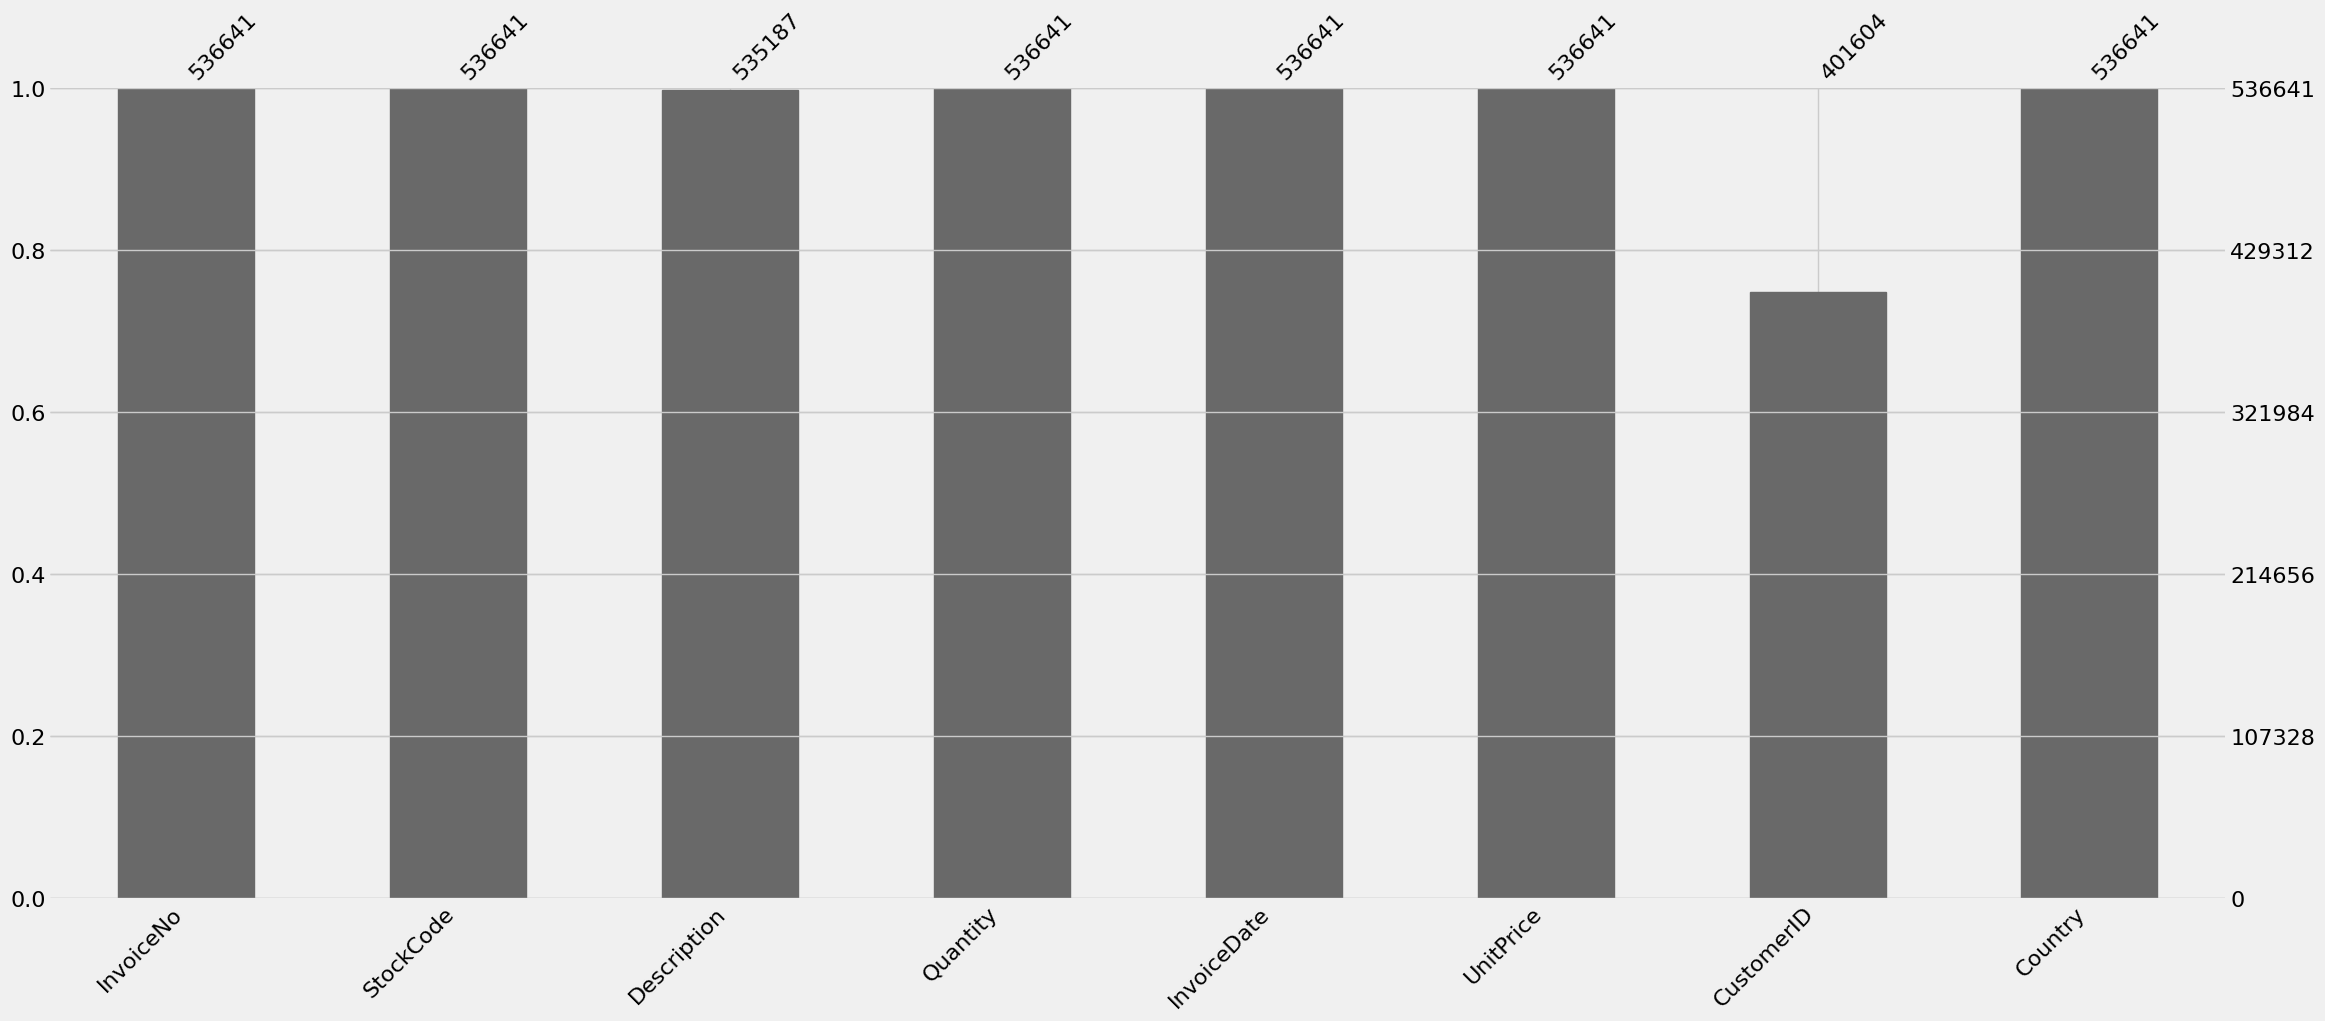

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
df.dropna(subset=['Description'],axis=0, inplace=True)

In [ ]:
df.dropna(subset=['CustomerID'],axis=0, inplace=True)

In [ ]:
df.shape

(401604, 8)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
duplicated_data_type = 'object'
df = df.loc[:, ~df.columns.duplicated()]
duplicated_data_type = ["float64","int64"]
df = df.loc[:, ~df.columns.duplicated()]

In [ ]:
df.shape

(401604, 8)

In [ ]:
df.describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


## Outliers handling

<Axes: xlabel='Quantity'>

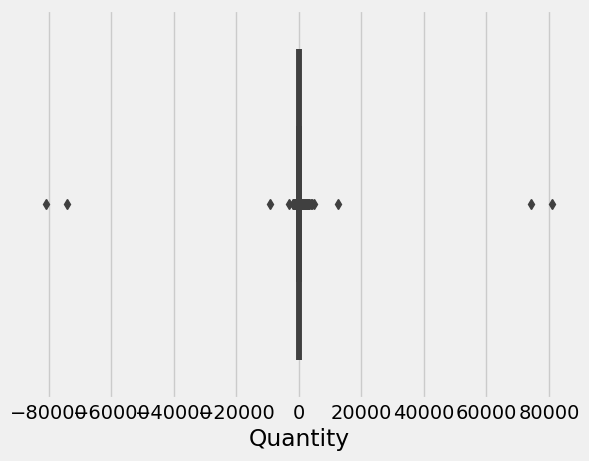

In [ ]:
df_Quantity=df["Quantity"]
sns.boxplot(x=df_Quantity)

In [ ]:
Q1 = df_Quantity.quantile(0.25)
Q3 = df_Quantity.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print('IQR :',IQR)
print('Lower limit :',lower_limit)
print('Upper limit :',upper_limit)

IQR : 10.0
Lower limit : -13.0
Upper limit : 27.0


In [ ]:
outlier_lower_limit=(df_Quantity<lower_limit)
df_Quantity[outlier_lower_limit]

236         -24
237         -24
238         -24
241         -24
4287      -9360
          ...  
537614      -25
537615     -100
540078      -48
540079      -72
540422   -80995
Name: Quantity, Length: 1021, dtype: int64

In [ ]:
outlier_upper_limit=(df_Quantity>upper_limit)
df_Quantity[outlier_upper_limit]

9         32
31        48
44        36
46        80
65        32
          ..
541835    40
541865    40
541866    36
541867    72
541868    48
Name: Quantity, Length: 25625, dtype: int64

In [ ]:
Q1

2.0

Now let's fill these values with the suppression method.

In [ ]:
df_Quantity[outlier_lower_limit]=lower_limit
df_Quantity[outlier_lower_limit]

236      -13
237      -13
238      -13
241      -13
4287     -13
          ..
537614   -13
537615   -13
540078   -13
540079   -13
540422   -13
Name: Quantity, Length: 1021, dtype: int64

In [ ]:
df_Quantity[outlier_upper_limit]=upper_limit
df_Quantity[outlier_upper_limit]

9         27
31        27
44        27
46        27
65        27
          ..
541835    27
541865    27
541866    27
541867    27
541868    27
Name: Quantity, Length: 25625, dtype: int64

In [ ]:
df_Quantity.head()

0    6
1    6
2    8
3    6
4    6
Name: Quantity, dtype: int64

<Axes: xlabel='Quantity'>

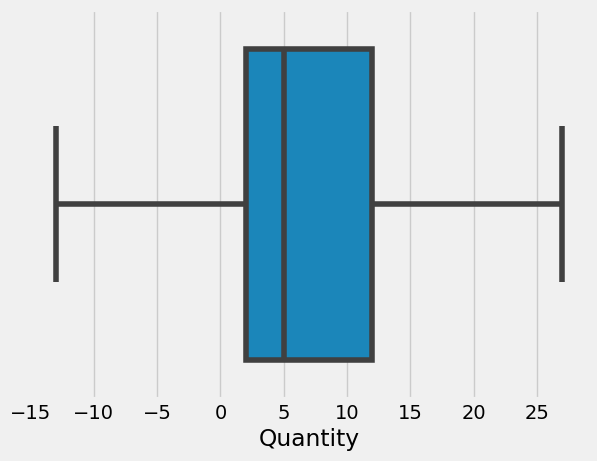

In [ ]:
sns.boxplot(x=df_Quantity)

## Data Analysis

In [ ]:
df = df.drop('Quantity', axis=1)
df=pd.concat([df,df_Quantity], axis=1)
df.head()

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country,Quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,2.55,17850,United Kingdom,6
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,3.39,17850,United Kingdom,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,2.75,17850,United Kingdom,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,3.39,17850,United Kingdom,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,3.39,17850,United Kingdom,6


### This dataframe contains 8 variables that correspond to:

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description:** Product (item) name. Nominal.

**Quantity:** The quantities of each product (item) per transaction. Numeric.

**InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country:** Country name. Nominal, the name of the country where each customer resides.

countries wise analysis

In [ ]:
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('Number of countries in the dataframe: {}'.format(len(countries)))

Number of countries in the dataframe: 37


In [ ]:
data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)